## Group C - EDA for Hypercharge Locations Dataset

This notebook serves as an exploratory data analysis (EDA) document for the `Hypercharge Locations Dataset`. The dataset is provided by *Free To X* as part of the *Big Data and Smart Data Analytics* project, with the primary aim of conducting a detailed site potential assessment and identifying optimal customer profiles from a behavioral perspective. The insights gathered will be instrumental for the business to optimize its charger placement strategy and understand customer usage patterns.

#### **Dataset Overview**
The dataset consists of several key variables that provide detailed information about the charging stations and their usage:

- **chargerId**:		Unique identifier for the charger.
- **serialNumber**:		Serial number of the charger hardware.
- **sshurl**:		SSH URL used to remotely access the charger.
- **sshPort**: Port number used for SSH access.
- **gpsLat**: Latitude coordinate of the charger’s GPS location.
- **gpsLong**: Longitude coordinate of the charger’s GPS location.
- **numberStacks**: Number of charging stacks present in the charger.
- **chassis**: Type or model of the charger’s chassis.
- **emergencyStop**: Indicates whether the emergency stop feature is enabled (True/False).
- **doorContactSwitch**: Indicates if the door contact switch is active (True/False).
- **standAloneOrBackend**: Indicates whether the charger operates standalone or connects to a backend system.
- **isPublic**: Indicates whether the charger is available for public use (True/False).
- **simIccid**: ICCID (Integrated Circuit Card Identifier) of the SIM card installed in the charger.
- **commissioningDate**: Date - Date the charger was commissioned and made operational.
- **chargePointIdentity**: Unique identity or name of the charge point.
- **customerIccid**: ICCID of the customer, if applicable.
- **serviceExpirationDate**: Expiration date of the charger’s service contract.
- **softwareExpirationDate**: Expiration date of the charger’s software license.
- **warrantyExpiration**: Date when the charger’s warranty expires.
- **websocketUrl**: URL used for WebSocket connections to monitor or manage the charger in real-time.
- **locationStreet**: Street address where the charger is located.
- **locationTown**: Town where the charger is located.
- **locationZipCode**: Postal code of the charger’s location.
- **locationProvince**: Province where the charger is located.
- **locationCountry**: Country where the charger is located.
- **locationUpdateNote**: Notes related to updates made to the charger’s location information.
- **calibrationLawOrdered**: Indicates whether a calibration law is required for the charger (True/False).
- **prohibitSoftwareupdates**: Indicates whether software updates are prohibited (True/False).
- **needsSpecialAccess**: Indicates whether the charger requires special access for maintenance or operation (True/False).
- **notServiceable**: Indicates whether the charger is currently not serviceable (True/False).
- **deadManSwitch**: Indicates whether the dead man switch feature is enabled (True/False).
- **hwVersion**: Hardware version of the charger.
- **telemetrySave**: Indicates whether telemetry data is being saved (True/False).
- **hymaintInstalled**: Indicates whether the HyMaint system is installed for remote monitoring and diagnostics (True/False).
- **isRemoteLocation**: Indicates if the charger is in a remote location (True/False).
- **lastSignOfLife**: Timestamp of the last communication or data exchange from the charger.
- **outletList**: List of outlets available on the charger, if there are multiple connectors.
- **status_position**: Position status of the charger, typically relating to availability or physical location.
- **status_errorcode**: Error code indicating the status of the charger in case of issues.
- **status_hycErrorCode**: Error code specific to the HyMaint system.
- **status_status**: General status of the charger (e.g., available, charging, error).
- **status_text**: Textual description of the charger’s current status.
- **status_updatetime**: Timestamp of the last status update for the charger.
- **status_isPrivate**: Indicates whether the charger is private (True/False).
- **simActivated**: Indicates whether the SIM card is activated (True/False).
- **simActivationDate**: Date when the SIM card was activated.
- **simLastRequest**: Timestamp of the last data request made using the SIM card.
- **excludeFromStatistics**: Indicates whether the charger is excluded from statistics (True/False).
- **isActive**: Indicates if the charger is currently active (True/False).
- **lastMaintenance**: Date when the charger was last maintained.
- **softwareVersion**: Current software version installed on the charger.
- **defaultSoftwareVersion**: Default software version for the charger.
- **isUtilityExecutionBlocked**: Indicates whether utility executions are blocked (True/False).
- **hymaintVersion**: Version of the HyMaint system installed.
- **allNotes**: General notes or comments about the charger.
- **officialEichrechtCompletion**: Date when the Eichrecht (calibration law) compliance was completed.
- **creditCardTerminalActive**: Indicates whether the credit card terminal is active (True/False).
- **endClientId**: Unique identifier for the end client that owns or operates the charger.
- **distributorId**: Unique identifier for the distributor of the charger.
- **corporationId**: Identifier for the corporation associated with the charger.
- **operatorId**: Unique identifier for the operator managing the charger.
- **enableClientWebinterface**: Indicates whether the web interface is enabled for the client (True/False).
- **endClientName**: Name of the end client that owns or operates the charger.
- **distributorName**: Name of the distributor responsible for the charger.
- **corporationName**: Name of the corporation associated with the charger.
- **operatorName**: Name of the operator managing the charger.
- **hasVollmacht**: Indicates if the charger has the Vollmacht (authority to act on behalf of a company) (True/False).
- **hasCommissioningProtocol**: Indicates whether the charger has a commissioning protocol (True/False).
- **surroundingChargers**: List of nearby chargers, if applicable.
- **isFavourite**: Indicates whether the charger is marked as a favorite by the operator or user (True/False).
- **sessionLiveViewEnabled**: Indicates whether live session view is enabled (True/False).
- **finishedEol**: Indicates if the charger has reached its end of life (True/False).
- **lendeeId**: Unique identifier for the person or entity that lent the charger, if applicable.
- **lendeeName**: Name of the lendee who lent the charger.

#### **Objectives**
1. **Site Potential Assessment**: 
   - Determine the most suitable locations for charger installations based on geographical, operational, and usage data.
   - Evaluate potential new sites by considering existing installations, performance metrics, and customer demand.

2. **Identification of Best Customer Personas**: 
   - Segment customers based on charger usage patterns, power consumption, and service needs.
   - Develop a behavioral segmentation model to identify high-value customers, enabling targeted marketing and service offerings.

This analysis aims to deliver actionable insights that will enhance the company's decision-making process for infrastructure expansion and improve customer experience through better understanding of user profiles.

In [ ]:
##importing dependencies
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from IPython.display import display
import folium
import seaborn as sns
import ast

In [2]:
#code to see 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
FILE_PATH = 'PATH TO YOUR/hypercarge_locations.csv'

df = pd.read_csv(FILE_PATH)
df.head()

,chargerId,serialNumber,sshurl,sshPort,gpsLat,gpsLong,numberStacks,chassis,emergencyStop,doorContactSwitch,...,corporationName,operatorName,hasVollmacht,hasCommissioningProtocol,surroundingChargers,isFavourite,sessionLiveViewEnabled,finishedEol,lendeeId,lendeeName
0,20800,23BZ1509B,10.245.161.30,NaN,45.041390,11.710673,4,HYC_300,False,True,...,Free To X S.p.A.,NaN,False,False,"[{'chargerId': 6772, 'gpsLat': 44.66244, 'gpsL...",False,False,True,NaN,NaN
1,17737,22BZ5330B,10.245.22.116,NaN,42.029548,11.962168,4,HYC_300,False,True,...,Free To X S.p.A.,NaN,False,False,"[{'chargerId': 6771, 'gpsLat': 42.49917, 'gpsL...",False,False,True,NaN,NaN
2,83776,24BZ1716B,10.246.181.216,NaN,43.812700,11.154000,4,HYC_300,False,True,...,Free To X S.p.A.,NaN,False,False,"[{'chargerId': 6772, 'gpsLat': 44.66244, 'gpsL...",False,NaN,True,NaN,NaN
3,19519,23BZ1033B,10.245.29.175,NaN,42.034378,12.648893,4,HYC_300,False,True,...,Free To X S.p.A.,NaN,False,False,"[{'chargerId': 6771, 'gpsLat': 42.49917, 'gpsL...",False,False,True,NaN,NaN
4,83781,24BZ1721B,10.246.186.62,NaN,NaN,NaN,4,HYC_300,False,True,...,Free To X S.p.A.,NaN,False,False,NaN,False,NaN,True,NaN,NaN


In [4]:
df.sample(5)

,chargerId,serialNumber,sshurl,sshPort,gpsLat,gpsLong,numberStacks,chassis,emergencyStop,doorContactSwitch,standAloneOrBackend,isPublic,simIccid,commissioningDate,chargePointIdentity,customerIccid,serviceExpirationDate,softwareExpirationDate,warrantyExpiration,websocketUrl,locationStreet,locationTown,locationZipCode,locationProvince,locationCountry,locationUpdateNote,calibrationLawOrdered,prohibitSoftwareupdates,needsSpecialAccess,notServiceable,deadManSwitch,hwVersion,telemetrySave,hymaintInstalled,isRemoteLocation,lastSignOfLife,outletList,status_position,status_errorcode,status_hycErrorCode,status_status,status_text,status_updatetime,status_isPrivate,simActivated,simActivationDate,simLastRequest,excludeFromStatistics,isActive,lastMaintenance,softwareVersion,defaultSoftwareVersion,isUtilityExecutionBlocked,hymaintVersion,allNotes,officialEichrechtCompletion,creditCardTerminalActive,endClientId,distributorId,corporationId,operatorId,enableClientWebinterface,endClientName,distributorName,corporationName,operatorName,hasVollmacht,hasCommissioningProtocol,surroundingChargers,isFavourite,sessionLiveViewEnabled,finishedEol,lendeeId,lendeeName
203,83794,24BZ1734B,10.246.191.116,NaN,NaN,NaN,4,HYC_300,False,True,Backend,False,8.945020e+18,NaN,NaN,89883030000085801501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,0,True,False,2024-07-05T10:26:48.096615+00:00,"[{'outletId': 1486402, 'chargerId': 83794, 'po...",0,NoError,NoError,Unavailable,No Error,2024-07-05T10:29:50+00:00,False,False,2024-06-26T00:00:00+00:00,2024-07-05T07:20:02.918478+00:00,False,False,NaN,hyc_v1.8.3,NaN,False,2.2.0,[],NaN,False,NaN,180,180,NaN,False,NaN,Free To X S.p.A.,Free To X S.p.A.,NaN,False,False,NaN,False,NaN,True,NaN,NaN
215,17423,22BZ5354B,10.245.20.235,NaN,41.497747,13.684203,4,HYC_300,False,True,Backend,False,8.945020e+18,2023-02-06T00:00:00,IT*F2X*EF2XITB4502,NaN,NaN,NaN,2024-11-25T00:00:00,ws://in-cpo.evway.net/ocpp/cpo,Autostrada del Sole 658,Castrocielo,3030.0,Lazio,Italy,NaN,NaN,False,False,False,False,4,0,True,False,2024-09-03T20:34:56.784479+00:00,"[{'outletId': 111971, 'chargerId': 17423, 'pos...",0,NoError,NoError,Available,NaN,2024-09-03T20:33:37+00:00,False,True,2022-11-04T00:00:00+00:00,2022-11-25T08:50:03.200393+00:00,False,True,NaN,hyc_v1.8.3,NaN,False,2.4.2,"[{'chargerNoteId': 1100896, 'chargerId': 17423...",NaN,False,NaN,180,180,NaN,False,NaN,Free To X S.p.A.,Free To X S.p.A.,NaN,False,False,"[{'chargerId': 8109, 'gpsLat': 41.04907, 'gpsL...",False,False,True,NaN,NaN
322,83800,24BZ1740B,10.246.191.183,NaN,NaN,NaN,4,HYC_300,False,True,Backend,False,8.945020e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,4,0,True,False,2024-07-05T19:10:53.350595+00:00,"[{'outletId': 1487667, 'chargerId': 83800, 'po...",0,InternalError,NaN,Unavailable,NaN,2024-07-07T03:00:03+00:00,False,False,2024-06-26T00:00:00+00:00,2024-07-05T17:50:02.673717+00:00,False,False,NaN,hyc_v1.8.3,NaN,False,2.2.0,[],NaN,False,NaN,180,180,NaN,False,NaN,Free To X S.p.A.,Free To X S.p.A.,NaN,False,False,NaN,False,NaN,True,NaN,NaN
60,19522,23BZ1036B,10.245.28.89,NaN,44.826193,10.380317,4,HYC_300,False,True,Backend,False,8.945020e+18,2024-02-26T00:00:00,IT*F2X*EF2XITA2501,NaN,NaN,NaN,2025-02-03T00:00:00,ws://in-cpo.evway.net/ocpp/cpo,NaN,NaN,NaN,NaN,Italy,CellTower localization!,NaN,False,False,False,False,4,0,True,False,2024-09-03T20:32:59.850092+00:00,"[{'outletId': 128244, 'chargerId': 19522, 'pos...",0,NoError,NoError,Available,NaN,2024-09-03T18:55:43+00:00,False,True,2023-01-23T00:00:00+00:00,2023-02-01T08:10:02.248856+00:00,False,True,NaN,hyc_v1.8.3,NaN,False,2.4.2,[],NaN,False,NaN,180,180,NaN,False,NaN,Free To X S.p.A.,Free To X S.p.A.,NaN,False,False,"[{'chargerId': 6772, 'gpsLat': 44.66244, 'gpsL...",False,False,True,NaN,NaN
44,17813,22BZ5318B,10.245.22.254,NaN,45.624755,8.712067,4,HYC_300,False,True,Backend,False,8.945020e+18,2023-09-26T00:00:00,IT*F2X*EF2XITMXPC03,NaN,NaN,NaN,2024-12-23T00:00:00,ws://in-cpo.evway

In [5]:
df.describe()

,chargerId,sshPort,gpsLat,gpsLong,numberStacks,simIccid,serviceExpirationDate,softwareExpirationDate,locationZipCode,calibrationLawOrdered,hwVersion,telemetrySave,status_position,lastMaintenance,defaultSoftwareVersion,officialEichrechtCompletion,endClientId,distributorId,corporationId,operatorId,endClientName,operatorName,lendeeId,lendeeName
count,374.000000,0.0,259.000000,259.000000,374.000000,3.720000e+02,0.0,0.0,153.000000,0.0,374.0,374.000000,374.0,0.0,0.0,0.0,0.0,374.000000,374.000000,0.0,0.0,0.0,0.0,0.0
mean,43247.780749,NaN,41.117911,6.143900,3.823529,8.945020e+18,NaN,NaN,35724.941176,NaN,4.0,0.181818,0.0,NaN,NaN,NaN,NaN,184.350267,186.018717,NaN,NaN,NaN,NaN,NaN
std,33380.514195,NaN,9.314472,15.581104,0.421770,7.217696e+06,NaN,NaN,24216.932744,NaN,0.0,0.450309,0.0,NaN,NaN,NaN,NaN,84.130167,85.055996,NaN,NaN,NaN,NaN,NaN
min,6590.000000,NaN,0.000000,-50.000000,1.000000,8.945020e+18,NaN,NaN,10.000000,NaN,4.0,0.000000,0.0,NaN,NaN,NaN,NaN,180.000000,180.000000,NaN,NaN,NaN,NaN,NaN
25%,13418.250000,NaN,41.849835,9.046675,4.000000,8.945020e+18,NaN,NaN,20045.000000,NaN,4.0,0.000000,0.0,NaN,NaN,NaN,NaN,180.000000,180.000000,NaN,NaN,NaN,NaN,NaN
50%,19747.500000,NaN,43.818792,11.419845,4.000000,8.945020e+18,NaN,NaN,31032.000000,NaN,4.0,0.000000,0.0,NaN,NaN,NaN,NaN,180.000000,180.000000,NaN,NaN,NaN,NaN,NaN
75%,83748.750000,NaN,44.962939,12.903881,4.000000,8.945020e+18,NaN,NaN,50019.000000,NaN,4.0,0.000000,0.0,NaN,NaN,NaN,NaN,180.000000,180.000000,NaN,NaN,NaN,NaN,NaN
max,83842.000000,NaN,57.000000,16.777855,4.000000,8.945020e+18,NaN,NaN,83100.000000,NaN,4.0,5.000000,0.0,NaN,NaN,NaN,NaN,1807.000000,1807.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   chargerId                    374 non-null    int64  
 1   serialNumber                 374 non-null    object 
 2   sshurl                       374 non-null    object 
 3   sshPort                      0 non-null      float64
 4   gpsLat                       259 non-null    float64
 5   gpsLong                      259 non-null    float64
 6   numberStacks                 374 non-null    int64  
 7   chassis                      374 non-null    object 
 8   emergencyStop                374 non-null    bool   
 9   doorContactSwitch            374 non-null    bool   
 10  standAloneOrBackend          374 non-null    object 
 11  isPublic                     374 non-null    bool   
 12  simIccid                     372 non-null    float64
 13  commissioningDate   

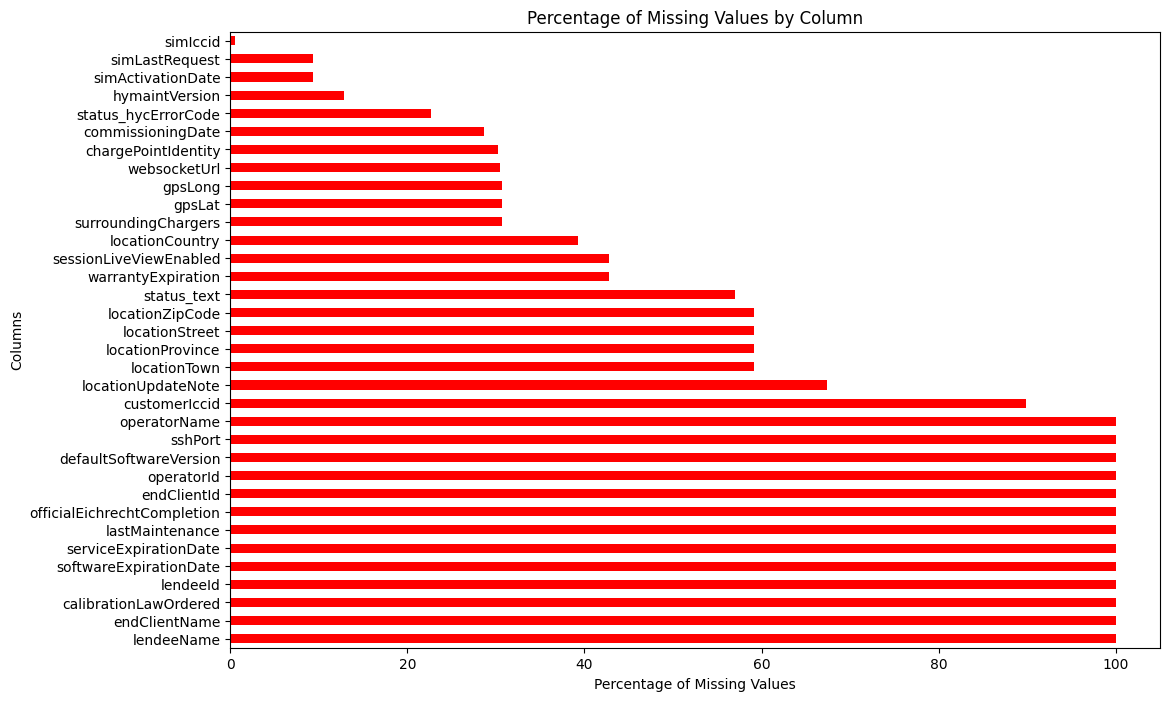

In [7]:
# Calculate the percentage of missing values for each column
missing_percent = df.isnull().mean().sort_values(ascending=True) * 100

# Filter to display only columns with missing data
missing_percent = missing_percent[missing_percent > 0]

plt.figure(figsize=(12, 8))
missing_percent.plot(kind='barh', color='Red')
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Percentage of Missing Values by Column")
plt.gca().invert_yaxis()
plt.show()


### Justification for Dropping Columns with High Missing Values

Based on the missing values analysis, several columns in the dataset have a 100% missing value percentage. Retaining these columns would provide little to no additional value in the analysis phase due to the lack of sufficient data. Therefore, we propose dropping the following columns:

- **operatorName**
- **sshPort**
- **serviceExpirationDate**
- **softwareExpirationDate**
- **defaultSoftwareVersion**
- **operatorId**
- **endClientId**
- **officialEichrechtCompletion**
- **lastMaintenance**
- **calibrationLawOrdered**
- **lendeeId**
- **endClientName**
- **lendeeName**

### Rationale:
1. **High Missing Rate**: These columns present 100% missing values making them unsuitable for statistical analysis or machine learning models.
2. **Limited Analytical Value**: Many of these columns (e.g., `lendeeId`, `endClientName`) are identifiers or technical parameters that do not significantly contribute to the core analysis objectives and that cannot be retrieved.

By dropping these columns, we streamline the dataset, reduce complexity, and ensure that the remaining variables are of higher quality and more relevant for the analysis.

In [ ]:
#code to drop columns
df = df.drop(columns=[
    'operatorName', 'lendeeId', 'endClientName', 'lendeeName', 'sshPort',
    'serviceExpirationDate', 'softwareExpirationDate', 'defaultSoftwareVersion',
    'operatorId', 'endClientId', 'officialEichrechtCompletion', 'lastMaintenance',
    'calibrationLawOrdered'])

In [10]:
#checking for duplicates
df.duplicated().sum()

0

In [12]:
#checking for unique values
df.nunique()

chargerId                    374
serialNumber                 374
sshurl                       374
gpsLat                       232
gpsLong                      232
numberStacks                   3
chassis                        3
emergencyStop                  1
doorContactSwitch              2
standAloneOrBackend            1
isPublic                       1
simIccid                     107
commissioningDate            113
chargePointIdentity          258
customerIccid                 38
warrantyExpiration            70
websocketUrl                   1
locationStreet                77
locationTown                  73
locationZipCode               60
locationProvince              16
locationCountry                1
locationUpdateNote            33
prohibitSoftwareupdates        1
needsSpecialAccess             1
notServiceable                 1
deadManSwitch                  2
hwVersion                      1
telemetrySave                  3
hymaintInstalled               2
isRemoteLo

In [ ]:
'''EMERGENCY STOP, STAND ALONE OR BACKEND, IS PUBLIC, WEBSOCKET URL, 
LOCATION COUNTRY, PROHIBIT SOFTWARE UPDATES,
NEEDS SPECIAL ACCESS, NOT SERVICEABLE''' 

# Identify columns with 1 unique value
columns_with_one_unique_value = df.nunique()[df.nunique() == 1].index

# Create a new small dataset with 'Variable', 'UniqueValue', 'NonNullValuesCount'
small_dataset_csv = pd.DataFrame({
    'Variable': columns_with_one_unique_value,
    'UniqueValue': [df[col].unique()[0] for col in columns_with_one_unique_value],
    'NonNullValuesCount': [df[col].notnull().sum() for col in columns_with_one_unique_value]
})

# Display the small dataset for columns with 1 unique value
display(small_dataset_csv)

,Variable,UniqueValue,NonNullValuesCount
0,emergencyStop,False,374
1,standAloneOrBackend,Backend,374
2,isPublic,False,374
3,websocketUrl,ws://in-cpo.evway.net/ocpp/cpo,260
4,locationCountry,Italy,227
5,prohibitSoftwareupdates,False,374
6,needsSpecialAccess,False,374
7,notServiceable,False,374
8,hwVersion,4,374
9,isRemoteLocation,False,374


### Justification for Dropping Columns with Only One Unique Value

Upon analyzing the dataset, we identified several columns that have only one unique value and are fully populated across all records. These columns include:

- **emergencyStop**: False
- **standAloneOrBackend**: Backend
- **isPublic**: False
- **prohibitSoftwareupdates**: False
- **needsSpecialAccess**: False
- **notServiceable**: False
- **hwVersion**: 4
- **isRemoteLocation**: False
- **status_position**: 0
- **status_isPrivate**: False
- **excludeFromStatistics**: False
- **isUtilityExecutionBlocked**: False
- **creditCardTerminalActive**: False
- **enableClientWebinterface**: False
- **hasVollmacht**: False
- **hasCommissioningProtocol**: False
- **finishedEol**: True

### Reasons for Dropping These Columns
1. **No Variability**: Since these columns contain the same value for all observations, they provide no discriminatory power and do not contribute any meaningful information for analysis or modeling.
   
2. **Redundant Information**: Variables like `standAloneOrBackend` and `isRemoteLocation` do not vary across records, making them redundant for the purpose of understanding differences between chargers or sites.

3. **Non-Actionable Insights**: Most of these columns (e.g., `isUtilityExecutionBlocked`, `hasVollmacht`) represent specific technical parameters or flags that are not relevant for the core objectives of the project, such as customer profiling or site potential assessment.

### Additional Columns to Drop
- **`locationCountry`**: This column has the value "Italy" for all entries. It is publicly known that the company currently operates exclusively within Italy (excluding regions like San Marino and the Vatican). Since the information is uniform and redundant, we can safely exclude it for now. If the company expands to new markets in the future, this column can be reintroduced to capture the updated geographic coverage.

### Exceptions: `sessionLiveViewEnabled` and `websocketUrl`
The `sessionLiveViewEnabled` and `websocketUrl` columns, despite having limited variability, should not be immediately dropped. They require further analysis as they might provide insights for **anomaly detection** or a clearer understanding of potential **software-related issues**. For example, there could be technical constraints (e.g., a particular software might not support the bi-directional real-time WebSocket communication protocol), which could explain why certain chargers have these features disabled. Therefore, keeping these columns for deeper exploration can reveal hidden dependencies and help in pinpointing causes of inconsistencies.

By removing the other columns, we reduce the dataset's complexity, eliminate redundant information, and maintain only the most meaningful variables for further analysis, while retaining these exceptions for their potential analytical value.

In [14]:
#removing columns from previous markdown insights
df = df.drop(columns=['emergencyStop', 'standAloneOrBackend', 'isPublic',
                      'prohibitSoftwareupdates', 'needsSpecialAccess', 'notServiceable',
                      'hwVersion', 'isRemoteLocation', 'status_position', 'status_isPrivate',
                      'excludeFromStatistics', 'isUtilityExecutionBlocked', 'creditCardTerminalActive',
                      'enableClientWebinterface', 'hasVollmacht', 'hasCommissioningProtocol', 'finishedEol'])

In [22]:
# Filter and clean the GPS data
df_gps = df[['gpsLat', 'gpsLong']].dropna()

# Create a map centered in Europe
map_europe = folium.Map(location=[50, 10], zoom_start=5)

# Add each charging station to the map as a marker
for _, row in df_gps.iterrows():
    folium.Marker(location=[row['gpsLat'], row['gpsLong']], popup=f"Lat: {row['gpsLat']}, Long: {row['gpsLong']}").add_to(map_europe)

# Display the map
map_europe.save("charging_stations_map.html")

display(map_europe)

In [23]:
# Select the relevant columns for investigation
location_cols = ['chargerId', 'gpsLat', 'gpsLong', 'locationStreet', 'locationTown', 'locationZipCode', 
                 'locationProvince', 'locationCountry', 'locationUpdateNote']

# Filter only rows with complete location data and GPS coordinates for better context
location_data = df[location_cols]

# Define Italy's geographical boundaries
italy_lat_min, italy_lat_max = 35.5, 47.1
italy_long_min, italy_long_max = 6.6, 18.5

# Create a mask for identifying outliers (GPS coordinates outside Italy's bounds)
outliers_mask = ~((location_data['gpsLat'] >= italy_lat_min) & (location_data['gpsLat'] <= italy_lat_max) &
                  (location_data['gpsLong'] >= italy_long_min) & (location_data['gpsLong'] <= italy_long_max))

# Retrieve outliers with their corresponding location details
outliers_with_location = location_data[outliers_mask]

# Display the outlier rows with location information
print(outliers_with_location)

     chargerId  gpsLat  gpsLong locationStreet locationTown  locationZipCode  \
4        83781     NaN      NaN            NaN          NaN              NaN   
5        76433     6.0    -46.0            NaN          NaN              NaN   
7        71205     5.0    -49.0            NaN          NaN              NaN   
8        83749     NaN      NaN            NaN          NaN              NaN   
9        81141     NaN      NaN            NaN          NaN              NaN   
17       81150     NaN      NaN            NaN          NaN              NaN   
18       83814     NaN      NaN            NaN          NaN              NaN   
19       76431    32.0    -50.0            NaN          NaN              NaN   
20       76432    34.0    -28.0            NaN          NaN              NaN   
23       83801     NaN      NaN            NaN          NaN              NaN   
26       83821     NaN      NaN            NaN          NaN              NaN   
29       76430    57.0    -46.0         

In [ ]:
'''RICCARDO IS WORKING ON PDR, TRY TO MERGE 
MY INACCURATE DATA IN HYPER_LOC WITH PDR'''

# Select the relevant columns for investigation
ricky_cols = ['chargerId', 'gpsLat', 'gpsLong', 'chargePointIdentity']

# Filter only rows with complete location data and GPS coordinates for better context
ricky_data = df[ricky_cols]

# Define Italy's geographical boundaries
italy_lat_min, italy_lat_max = 35.5, 47.1
italy_long_min, italy_long_max = 6.6, 18.5

# Create a mask for identifying outliers (GPS coordinates outside Italy's bounds)
outliers_mask = ~((ricky_data['gpsLat'] >= italy_lat_min) & (ricky_data['gpsLat'] <= italy_lat_max) &
                  (ricky_data['gpsLong'] >= italy_long_min) & (ricky_data['gpsLong'] <= italy_long_max))

# Retrieve outliers with their corresponding location details
outliers_with_location = ricky_data[outliers_mask]

# Display the outlier rows with location information
print(outliers_with_location)

     chargerId  gpsLat  gpsLong chargePointIdentity
5        76433     6.0    -46.0  IT*F2X*EF2XITB4003
7        71205     5.0    -49.0  IT*F2X*EF2XITM2103
19       76431    32.0    -50.0  IT*F2X*EF2XITN3603
20       76432    34.0    -28.0  IT*F2X*EF2XITM2004
29       76430    57.0    -46.0  IT*F2X*EF2XITD2104
31       71207    11.0    -22.0  IT*F2X*EF2XITN0504
35       76417    27.0    -32.0  IT*F2X*EF2XITB5104
73       19514    37.0    -33.0  IT*F2X*EF2XITT0101
83       71204    27.0    -22.0  IT*F2X*EF2XITN0503
86       76435    11.0    -40.0  IT*F2X*EF2XITN0604
90       83785    28.0    -31.0  IT*F2X*EF2XITA6604
111      76411    43.0    -23.0  IT*F2X*EF2XITN3604
113      76427    45.0    -39.0  IT*F2X*EF2XITA2003
147      76424    15.0    -34.0  IT*F2X*EF2XITB5103
173      76434    32.0    -24.0  IT*F2X*EF2XITN5004
178      76419     5.0    -34.0  IT*F2X*EF2XITA8604
225      76414     2.0    -39.0  IT*F2X*EF2XITN5003
251      76428    14.0    -43.0  IT*F2X*EF2XITB4004
253      795

In [ ]:
# Extract the unique chargePointIdentity values from the outliers
chargepoint_identities = outliers_with_location['chargePointIdentity'].unique().tolist()

# Print the resulting list of chargePointIdentity
print("List of chargePointIdentity related to the outliers:")
print(chargepoint_identities)
print('----\n----\n----\n') 
print(len(chargepoint_identities))

List of chargePointIdentity related to the outliers:
['IT*F2X*EF2XITB4003', 'IT*F2X*EF2XITM2103', 'IT*F2X*EF2XITN3603', 'IT*F2X*EF2XITM2004', 'IT*F2X*EF2XITD2104', 'IT*F2X*EF2XITN0504', 'IT*F2X*EF2XITB5104', 'IT*F2X*EF2XITT0101', 'IT*F2X*EF2XITN0503', 'IT*F2X*EF2XITN0604', 'IT*F2X*EF2XITA6604', 'IT*F2X*EF2XITN3604', 'IT*F2X*EF2XITA2003', 'IT*F2X*EF2XITB5103', 'IT*F2X*EF2XITN5004', 'IT*F2X*EF2XITA8604', 'IT*F2X*EF2XITN5003', 'IT*F2X*EF2XITB4004', 'IT*F2X*EF2XITA1003', 'IT*F2X*EF2XITZ9904', 'IT*F2X*EF2XITA8603', 'IT*F2X*EF2XITA8503', 'IT*F2X*EF2XITB4103', 'IT*F2X*EF2XITN0603', 'IT*F2X*EF2XITM2003', 'IT*F2X*EF2XITI1103', 'IT*F2X*EF2XITZ9903', 'IT*F2X*EF2XITM3102', 'IT*F2X*EF2XITA1103', 'IT*F2X*EF2XITA1104', 'IT*F2X*EF2XITH3004']


In [ ]:
'''QUESTO CODICE DROPPA LE COLONNINE PER LE QUALI
NON ABBIAMO LOCATION DATA:
SI RICHIEDE ULTERIORE INVESTIGAZIONE'''

# Define columns to check for NaN values
location_columns = ['gpsLat', 'gpsLong', 'locationStreet', 'locationTown', 
                    'locationZipCode', 'locationProvince', 'locationCountry']

# Drop rows where all location and GPS data are NaN
df = df.dropna(subset=location_columns, how='all')

# Show the number of rows dropped
rows_dropped = 374 - len(df)
print(f"Rows Dropped: {rows_dropped}")
print(f"Remaining Rows: {len(df)}")

Rows Dropped: 115
Remaining Rows: 259


In [28]:
# Define the relevant columns for better context
location_cols = ['chargerId', 'gpsLat', 'gpsLong', 'locationStreet', 'locationTown', 'locationZipCode', 
                 'locationProvince', 'locationCountry', 'locationUpdateNote']

# Filter only rows with complete location data and GPS coordinates for better context
location_data = df[location_cols]

# Define Italy's geographical boundaries
italy_lat_min, italy_lat_max = 35.5, 47.1
italy_long_min, italy_long_max = 6.6, 18.5

# Create a mask for identifying rows with GPS coordinates falling outside Italy's bounds
outside_italy_mask = ((location_data['gpsLat'] < italy_lat_min) | (location_data['gpsLat'] > italy_lat_max) |
                      (location_data['gpsLong'] < italy_long_min) | (location_data['gpsLong'] > italy_long_max))

# Retrieve rows that are outside Italy's boundaries with their corresponding location details
outside_italy_with_location = location_data[outside_italy_mask]

# Display the rows that fall outside Italy
print(outside_italy_with_location)

     chargerId  gpsLat  gpsLong locationStreet locationTown  locationZipCode  \
5        76433     6.0    -46.0            NaN          NaN              NaN   
7        71205     5.0    -49.0            NaN          NaN              NaN   
19       76431    32.0    -50.0            NaN          NaN              NaN   
20       76432    34.0    -28.0            NaN          NaN              NaN   
29       76430    57.0    -46.0            NaN          NaN              NaN   
31       71207    11.0    -22.0            NaN          NaN              NaN   
35       76417    27.0    -32.0            NaN          NaN              NaN   
73       19514    37.0    -33.0            NaN          NaN              NaN   
83       71204    27.0    -22.0            NaN          NaN              NaN   
86       76435    11.0    -40.0            NaN          NaN              NaN   
90       83785    28.0    -31.0            NaN          NaN              NaN   
111      76411    43.0    -23.0         

In [ ]:
'''Dropping rows for which we have gps data
but no location data:
Requires deeper investigation'''

# Define the location columns that we need to check for missing values
location_info_cols = ['locationStreet', 'locationTown', 'locationZipCode', 'locationProvince', 'locationCountry']

# Create a mask for rows where lat/long are present but all location columns are NaN
gps_not_na_mask = df['gpsLat'].notna() & df['gpsLong'].notna()
location_na_mask = df[location_info_cols].isna().all(axis=1)

# Drop rows where lat/long are present but all location columns are missing
df = df[~(gps_not_na_mask & location_na_mask)]

# Show the number of rows dropped and the cleaned dataset
rows_dropped = 259 - len(df)
print(f"Total Rows Dropped: {rows_dropped}")
print(f"Remaining Rows: {len(df)}")

Total Rows Dropped: 32
Remaining Rows: 227


In [31]:
# Filter and clean the GPS data
df_gps = df[['gpsLat', 'gpsLong']].dropna()

# Create a map centered in Europe
map_europe = folium.Map(location=[50, 10], zoom_start=5)

# Add each charging station to the map as a marker
for _, row in df_gps.iterrows():
    folium.Marker(location=[row['gpsLat'], row['gpsLong']], popup=f"Lat: {row['gpsLat']}, Long: {row['gpsLong']}").add_to(map_europe)

# Display the map
map_europe.save("charging_stations_map.html")

display(map_europe)

In [ ]:
'''HO GUARDATO AD OCCHIO L'IMMAGINE 
NON SO QUANTO SIA PROFESSIONALE QUESTO CODICE
MA NON VEDO ALTERNATIVE MIGLIORI PER ORA'''

# List of outlier GPS coordinates from the images
outlier_coords = [
    (41.569647, 15.518173),
    (41.4877, 13.69),
    (41.68596811184035, 13.513187604772613),
    (42.200748, 14.59728),
    (42.032747, 11.953672),
    (42.62348381178956, 12.232490713525506),
    (42.799503, 12.020228),
    (42.868913, 12.026451)
]

# Filter the dataset for these specific GPS coordinates
outlier_df = df[df.apply(lambda row: (row['gpsLat'], row['gpsLong']) in outlier_coords, axis=1)]

# Select only the geo-positional columns (GPS and location details)
geo_columns = ['gpsLat', 'gpsLong', 'locationStreet', 'locationTown', 'locationZipCode', 
               'locationProvince', 'locationCountry', 'locationUpdateNote']

# Filter to show only the required columns
outlier_geo_df = outlier_df[geo_columns]

# Display the filtered dataset
display(outlier_geo_df)

,gpsLat,gpsLong,locationStreet,locationTown,locationZipCode,locationProvince,locationCountry,locationUpdateNote
49,42.623484,12.232491,Autostrada del Sole,Province of Viterbo,1020.0,Lazio,Italy,NaN
65,42.799503,12.020228,NaN,NaN,NaN,NaN,Italy,CellTower localization!
97,41.685968,13.513188,Autostrada del Sole,Province of Frosinone,3025.0,Lazio,Italy,CellTower localization!
117,42.032747,11.953672,NaN,NaN,NaN,NaN,Italy,CellTower localization!
154,42.868913,12.026451,NaN,NaN,NaN,NaN,Italy,CellTower localization!
248,41.569647,15.518173,NaN,NaN,NaN,NaN,Italy,CellTower localization!
267,41.487700,13.690000,NaN,NaN,NaN,NaN,Italy,CellTower localization!
344,42.200748,14.597280,NaN,NaN,NaN,NaN,Italy,CellTower localization!


In [ ]:
# List of GPS outliers to exclude
outlier_coords_to_exclude = [
    (41.569647, 15.518173),
    (41.4877, 13.69),
    (41.68596811184035, 13.513187604772613),
    (42.200748, 14.59728),
    (42.032747, 11.953672),
    (42.62348381178956, 12.232490713525506),
    (42.799503, 12.020228),
    (42.868913, 12.026451)
]

# Apply a filter directly on the original dataframe to exclude these GPS outliers
df = df[df.apply(lambda row: (row['gpsLat'], row['gpsLong']) not in outlier_coords_to_exclude, axis=1)]

# Display the cleaned DataFrame
print(f"Total Rows After Excluding Specified Outliers: {len(df)}")

Total Rows After Excluding Specified Outliers: 219
<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 0 to 369
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   chargerId               219 non-null    int64  
 1   serialNumber            219 non-null    object 
 2   sshurl                  219 non-null    object 
 3   gpsLat                  219 non-null    float64
 4   gpsLong                 219 non-null    float64
 5   numberStacks            219 non-null    int64  
 6   chassis                 219 non-null    object 
 7   doorContactSwitch       219 non-null    bool   
 8   simIccid                218 non-null    float64
 9   commissioningDate       219 non-null    object 
 10  chargePointIdentity     211 non-null    object 
 11  customerIccid           6 non-null      object 
 12  warrantyExpiration      201 non-null    object 
 13  websocketUrl            211 non-null    object 
 

### Geo-Positional Data Conclusion - Updated Version

#### **1. Overview of the Geo-Positional Analysis**
The initial geo-positional data analysis highlighted several inconsistencies and anomalies within the dataset, specifically involving GPS coordinates that were either placed outside Italy or not situated on any identifiable streets or highways. These issues could have been due to incorrect data entries, misconfigured hardware, or poor signal localization, especially if the charger installation location was not captured accurately during setup.

To address these problems, we performed a series of filtering steps to exclude unreliable data points and focus only on well-defined locations. This cleaned and refined dataset now provides a stronger basis for further site analysis and infrastructure planning.

#### **2. Issue with Outliers and Missing Location Data**
The main challenge in the geo-positional analysis stemmed from rows containing:
1. **GPS Outliers**: Points that did not align with expected geographical bounds (e.g., being located far off highways or in non-relevant regions).
2. **Missing or Incomplete Location Data**: Rows that lacked supporting information such as `locationStreet`, `locationTown`, `locationZipCode`, `locationProvince`, or `locationCountry`. Without this contextual data, GPS coordinates alone are not reliable enough for precise analysis.

After thorough investigation, we determined that such rows would either:
- Be removed if they lacked complete location context (e.g., only GPS coordinates but no other details).
- Be retained if they had partial or complete location data, which could be manually verified or corrected later.

#### **3. Actions Taken to Resolve Issues**
To improve the quality and reliability of our dataset, the following steps were applied:

1. **Exclusion of GPS Outliers Without Location Data**:
   - We identified specific outlier GPS coordinates that were clearly misplaced (e.g., not aligned with known road networks or highways).
   - These outliers were dropped **only** when they had all other location-related columns marked as `NaN`, as this indicates that their true location cannot be confirmed or recovered.

   Outliers removed include:
   - (41.569647, 15.518173)
   - (41.4877, 13.69)
   - (42.200748, 14.59728)
   - (42.032747, 11.953672)
   - (42.799503, 12.020228)
   - (42.868913, 12.026451)

2. **Retained Outliers with Partial Location Data**:
   - Some outlier GPS points had incomplete but usable location data, such as `locationStreet` or `locationTown`. These rows were kept in the dataset for potential manual review and correction.
   - The objective is to investigate these rows further to either validate their position or correct them using available address data.

   Examples include:
   - **Lat**: 41.685968, **Long**: 13.513188 - Listed as "Autostrada del Sole", Province of Frosinone.
   - **Lat**: 42.623484, **Long**: 12.232491 - Listed as "Autostrada del Sole", Province of Viterbo.

#### **4. Conclusion and Next Steps**
By filtering out irrelevant outliers and retaining only those with partial location data, the dataset is now much more reliable for further analysis. This improved data quality will support better decision-making when evaluating potential sites for new charging stations, as well as help in understanding the usage patterns and behaviors across the network.

### Summary:
- **Dropped Rows**: Outlier GPS points with no supporting location context.
- **Retained Rows**: Points with GPS outliers but at least some relevant location information.
- **Impact**: This approach has reduced the noise in the dataset and strengthened its usability for site potential assessments and anomaly detection.

Moving forward, we recommend a **manual review** of the remaining GPS outliers with partial location data and potentially leveraging external tools (e.g., Google Maps, OpenStreetMap) to validate or update these entries accurately.


In [47]:
# Display the unique values for 'numberStacks'
number_stacks_unique = df['numberStacks'].unique()
print(f"Unique values in 'numberStacks': {number_stacks_unique}")

# Display the unique values for 'chassis'
chassis_unique = df['chassis'].unique()
print(f"Unique values in 'chassis': {chassis_unique}")


Unique values in 'numberStacks': [4 3 1]
Unique values in 'chassis': ['HYC_300' 'HYC_400' 'HYC_150']


In [48]:
# Find rows where 'chassis' is 'HYC_150' and 'numberStacks' is greater than 2
invalid_stacks = df[(df['chassis'] == 'HYC_150') & (df['numberStacks'] > 2)]

# Check if there are any invalid rows
if not invalid_stacks.empty:
    print("Found invalid configurations where HYC_150 has more than 2 stacks:")
    print(invalid_stacks)
else:
    print("No invalid configurations found for HYC_150 chassis.")

No invalid configurations found for HYC_150 chassis.


### Validation of `numberStacks` Constraint for `HYC_150` Chassis

#### **Context**
In the dataset for hypercharge stations, each charger is categorized by its chassis type (`chassis`) and the number of stacks (`numberStacks`). As a business rule, the `HYC_150` chassis type is designed to support a **maximum of 2 stacks**. Any configuration where the `HYC_150` chassis has more than 2 stacks is considered an invalid configuration and needs to be identified and corrected.

#### **Objective**
The objective of this validation step is to ensure that the dataset adheres to this constraint. Specifically, we want to:
1. Identify rows where the `chassis` is `HYC_150` but the number of stacks (`numberStacks`) is greater than 2.
2. Highlight any such rows to facilitate data cleaning and correction.

#### **Process**
To perform this validation, we applied the following logic:

1. **Filter the Data**:
   - Filtered the dataset to retrieve only the rows where:
     - `chassis` is equal to `HYC_150`
     - `numberStacks` is greater than 2

2. **Check for Violations**:
   - If such rows exist, they are flagged as constraint violations.
   - If no such rows are found, it indicates that the `HYC_150` configuration adheres to the defined business rule.

3. **Output**:
   - Display the identified rows with invalid configurations, if any.
   - Print a message indicating whether violations were found or not.

#### **Code Implementation**
The following code was used to identify these potential violations:

```python
# Find rows where 'chassis' is 'HYC_150' and 'numberStacks' is greater than 2
invalid_stacks = df_original[(df_original['chassis'] == 'HYC_150') & (df_original['numberStacks'] > 2)]

# Check if there are any invalid rows
if not invalid_stacks.empty:
    print("Found invalid configurations where HYC_150 has more than 2 stacks:")
    print(invalid_stacks)
else:
    print("No invalid configurations found for HYC_150 chassis.")


In [53]:
# Check for uniqueness of simIccid
unique_simIccid = df['simIccid'].nunique()
print(f"Number of unique SIM ICCIDs: {unique_simIccid}")
print(f"Total non-null SIM ICCIDs: {df['simIccid'].notna().sum()}")

# Check rows with missing simIccid
missing_simIccid = df[df['simIccid'].isna()]
print("Rows with missing simIccid:")
print(missing_simIccid)

# Check length and format of simIccid values
df['simIccid_length'] = df['simIccid'].astype(str).apply(len)
print(df['simIccid_length'].value_counts())


Number of unique SIM ICCIDs: 77
Total non-null SIM ICCIDs: 218
Rows with missing simIccid:
    chargerId serialNumber        sshurl     gpsLat   gpsLong  numberStacks  \
55      16939    22BZ6974B  10.245.21.90  44.874039  8.833501             4   

    chassis  doorContactSwitch  simIccid    commissioningDate  \
55  HYC_300               True       NaN  2023-04-18T00:00:00   

   chargePointIdentity customerIccid   warrantyExpiration  \
55  IT*F2X*EF2XITG7002           NaN  2024-12-06T00:00:00   

                      websocketUrl locationStreet locationTown  \
55  ws://in-cpo.evway.net/ocpp/cpo            NaN          NaN   

    locationZipCode locationProvince locationCountry       locationUpdateNote  \
55              NaN              NaN           Italy  CellTower localization!   

    deadManSwitch  telemetrySave  hymaintInstalled  \
55           True              0              True   

                      lastSignOfLife  \
55  2024-09-03T20:33:37.978534+00:00   

          

In [ ]:
# Check for duplicate serialNumber and chargePointIdentity
duplicates = df[(df['serialNumber'] == '22BZ6974B') & (df['chargePointIdentity'] == 'IT*F2X*EF2XITG7002')]
print("Potential Duplicates for the Missing SIM ICCID Row:")
print(duplicates)

Potential Duplicates for the Missing SIM ICCID Row:
    chargerId serialNumber        sshurl     gpsLat   gpsLong  numberStacks  \
55      16939    22BZ6974B  10.245.21.90  44.874039  8.833501             4   

    chassis  doorContactSwitch  simIccid    commissioningDate  \
55  HYC_300               True       NaN  2023-04-18T00:00:00   

   chargePointIdentity customerIccid   warrantyExpiration  \
55  IT*F2X*EF2XITG7002           NaN  2024-12-06T00:00:00   

                      websocketUrl locationStreet locationTown  \
55  ws://in-cpo.evway.net/ocpp/cpo            NaN          NaN   

    locationZipCode locationProvince locationCountry       locationUpdateNote  \
55              NaN              NaN           Italy  CellTower localization!   

    deadManSwitch  telemetrySave  hymaintInstalled  \
55           True              0              True   

                      lastSignOfLife  \
55  2024-09-03T20:33:37.978534+00:00   

                                           outlet

In [55]:
# Check for uniqueness of chargePointIdentity
unique_chargePoints = df['chargePointIdentity'].nunique()
print(f"Number of unique Charge Point Identities: {unique_chargePoints}")
print(f"Total non-null Charge Point Identities: {df['chargePointIdentity'].notna().sum()}")

# Identify rows with missing chargePointIdentity
missing_charge_points = df[df['chargePointIdentity'].isna()]
print("Rows with missing chargePointIdentity:")
print(missing_charge_points)

Number of unique Charge Point Identities: 210
Total non-null Charge Point Identities: 211
Rows with missing chargePointIdentity:
     chargerId serialNumber          sshurl   gpsLat  gpsLong  numberStacks  \
2        83776    24BZ1716B  10.246.181.216  43.8127  11.1540             4   
85       83753    24BZ1693B  10.246.181.248  44.4277  11.6013             4   
99       83779    24BZ1719B   10.246.182.44  43.8226  11.1515             4   
124      83768    24BZ1708B  10.246.181.246  44.4277  11.6013             4   
188      83756    24BZ1696B   10.246.182.11  43.0941  11.7806             4   
259      83772    24BZ1712B  10.246.181.117  43.0941  11.7806             4   
268      83759    24BZ1699B  10.246.181.144  43.0941  11.7806             4   
324      83777    24BZ1717B   10.246.182.18  43.4081  11.7649             4   

     chassis  doorContactSwitch      simIccid    commissioningDate  \
2    HYC_300               True  8.945020e+18  2024-08-09T00:00:00   
85   HYC_300       

In [63]:
# Display rows where chargePointIdentity is missing
df_missing_chargepoint = df[df['chargePointIdentity'].isna()]
print("Details of Missing Charge Point Identities:")
df_missing_chargepoint[['simIccid', 'commissioningDate']]


Details of Missing Charge Point Identities:


,simIccid,commissioningDate
2,8.945020e+18,2024-08-09T00:00:00
85,8.945020e+18,2024-08-10T00:00:00
99,8.945020e+18,2024-08-10T00:00:00
124,8.945020e+18,2024-08-09T00:00:00
188,8.945020e+18,2024-07-31T00:00:00
259,8.945020e+18,2024-07-31T00:00:00
268,8.945020e+18,2024-07-31T00:00:00
324,8.945020e+18,2024-07-31T00:00:00


In [64]:
# Apply display settings for expanded output
pd.set_option('display.max_colwidth', None)  # Display full column width
pd.set_option('display.max_columns', None)   # Show all columns without truncation
pd.set_option('display.max_rows', None)      # Show all rows if required
pd.set_option('display.float_format', lambda x: '%.0f' % x)  # Disable scientific notation for floats

# Re-display the DataFrame
print("Details of Missing Charge Point Identities (Expanded):")
print(df_missing_chargepoint[['simIccid', 'commissioningDate']])

Details of Missing Charge Point Identities (Expanded):
               simIccid    commissioningDate
2   8945020282312848384  2024-08-09T00:00:00
85  8945020282312847360  2024-08-10T00:00:00
99  8945020282312846336  2024-08-10T00:00:00
124 8945020282312848384  2024-08-09T00:00:00
188 8945020282312847360  2024-07-31T00:00:00
259 8945020282312845312  2024-07-31T00:00:00
268 8945020282312846336  2024-07-31T00:00:00
324 8945020282312847360  2024-07-31T00:00:00


In [ ]:
# Group by simIccid and count the number of occurrences
simIccid_counts = df_missing_chargepoint['simIccid'].value_counts()
print("Count of Each SIM ICCID in Rows with Missing Charge Point Identity:")
print(simIccid_counts)

Count of Each SIM ICCID in Rows with Missing Charge Point Identity:
simIccid
8945020282312847360    3
8945020282312848384    2
8945020282312846336    2
8945020282312845312    1
Name: count, dtype: int64


In [ ]:
# Display rows grouped by simIccid for further inspection
for sim_id in df_missing_chargepoint['simIccid'].unique():
    print(f"Details for SIM ICCID: {sim_id}")
    print(df[df['simIccid'] == sim_id][['serialNumber', 'commissioningDate', 'gpsLat', 'gpsLong']])

Details for SIM ICCID: 8.945020282312848e+18
    serialNumber    commissioningDate  gpsLat  gpsLong
2      24BZ1716B  2024-08-09T00:00:00      44       11
28     24BZ1705B  2024-07-25T00:00:00      45        9
93     24BZ1702B  2024-07-27T00:00:00      41       14
124    24BZ1708B  2024-08-09T00:00:00      44       12
Details for SIM ICCID: 8.945020282312847e+18
    serialNumber    commissioningDate  gpsLat  gpsLong
85     24BZ1693B  2024-08-10T00:00:00      44       12
188    24BZ1696B  2024-07-31T00:00:00      43       12
324    24BZ1717B  2024-07-31T00:00:00      43       12
Details for SIM ICCID: 8.945020282312846e+18
    serialNumber    commissioningDate  gpsLat  gpsLong
99     24BZ1719B  2024-08-10T00:00:00      44       11
100    24BZ1694B  2024-07-25T00:00:00      45        9
268    24BZ1699B  2024-07-31T00:00:00      43       12
279    24BZ1707B  2024-07-25T00:00:00      45        9
318    24BZ1715B  2024-07-26T00:00:00      46        9
Details for SIM ICCID: 8.945020282312845

In [67]:
# Create a temporary chargePointIdentity using simIccid and commissioningDate for missing values
df.loc[df['chargePointIdentity'].isna(), 'chargePointIdentity'] = (
    df['simIccid'].astype(str) + "_" + df['commissioningDate'].astype(str)
)

# Display updated rows
print("Updated DataFrame with Temporary chargePointIdentity:")
print(df[df['simIccid'].isin(['8945020282312847360', '8945020282312848384', '8945020282312846336'])][['simIccid', 'commissioningDate', 'chargePointIdentity']])


Updated DataFrame with Temporary chargePointIdentity:
Empty DataFrame
Columns: [simIccid, commissioningDate, chargePointIdentity]
Index: []


In [68]:
# Convert commissioningDate to datetime
df['commissioningDate'] = pd.to_datetime(df['commissioningDate'], errors='coerce')
print(df['commissioningDate'].head())


0   2023-12-06
1   2023-03-02
2   2024-08-09
3   2023-07-04
6   2023-11-08
Name: commissioningDate, dtype: datetime64[ns]


In [ ]:
# Check for future dates or invalid commissioning dates
invalid_dates = df[(df['commissioningDate'] > pd.Timestamp.now()) | (df['commissioningDate'].isna())]
print("Invalid or future commissioning dates found:")
print(invalid_dates)

Invalid or future commissioning dates found:
Empty DataFrame
Columns: [chargerId, serialNumber, sshurl, gpsLat, gpsLong, numberStacks, chassis, doorContactSwitch, simIccid, commissioningDate, chargePointIdentity, customerIccid, warrantyExpiration, websocketUrl, locationStreet, locationTown, locationZipCode, locationProvince, locationCountry, locationUpdateNote, deadManSwitch, telemetrySave, hymaintInstalled, lastSignOfLife, outletList, status_errorcode, status_hycErrorCode, status_status, status_text, status_updatetime, simActivated, simActivationDate, simLastRequest, isActive, softwareVersion, hymaintVersion, allNotes, distributorId, corporationId, distributorName, corporationName, surroundingChargers, isFavourite, sessionLiveViewEnabled, simIccid_length]
Index: []


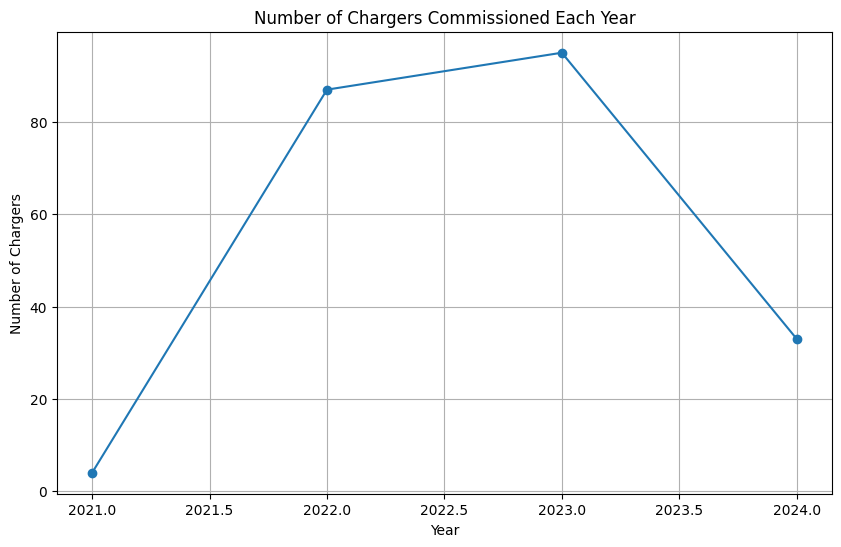

In [70]:
# Group by year and count the number of new chargers commissioned each year
df['year_commissioned'] = df['commissioningDate'].dt.year
year_commissioned_counts = df['year_commissioned'].value_counts().sort_index()

# Plotting the commissioning trend
plt.figure(figsize=(10, 6))
plt.plot(year_commissioned_counts.index, year_commissioned_counts.values, marker='o')
plt.title("Number of Chargers Commissioned Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Chargers")
plt.grid()
plt.show()


/var/folders/tm/r77r77ln7ysbqnt4p3zc7ny80000gn/T/ipykernel_33678/1286834003.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=year_commissioned_counts.index, y=year_commissioned_counts.values, palette='viridis')


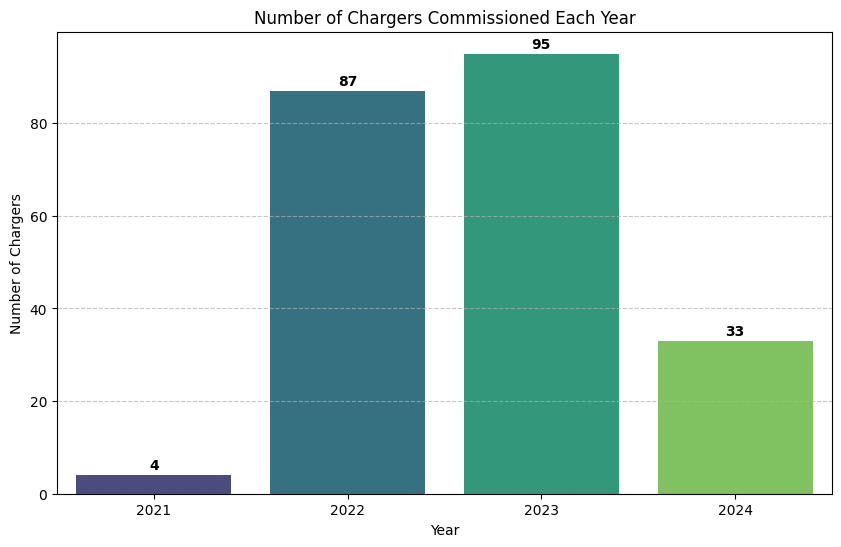

In [ ]:
# Example bar plot using `commissioningDate` column (you can replace with your preferred column)
# First, ensure commissioningDate is converted to a datetime type and extract the year
df['commissioningYear'] = pd.to_datetime(df['commissioningDate'], errors='coerce').dt.year

# Count the number of chargers commissioned each year
year_commissioned_counts = df['commissioningYear'].value_counts().sort_index()

# Plotting the commissioning trend using a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=year_commissioned_counts.index, y=year_commissioned_counts.values, palette='viridis')

# Adding labels on top of each bar
for index, value in enumerate(year_commissioned_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontweight='bold')

plt.title("Number of Chargers Commissioned Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Chargers")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [78]:
# Filter rows where 'warrantyExpiration' is missing
missing_warranty_ids = df[df['warrantyExpiration'].isna()]['chargerId']

# Display the charger IDs with missing warranty expiration
print("Charger IDs with Missing Warranty Expiration:")
print(missing_warranty_ids)

Charger IDs with Missing Warranty Expiration:
2      83776
28     83765
51     71210
62     83789
85     83753
92     83820
93     83762
99     83779
100    83754
122    76421
124    83768
188    83756
259    83772
268    83759
279    83767
318    83775
324    83777
326    83836
Name: chargerId, dtype: int64


In [ ]:
# Convert columns to datetime format if not already done
df['commissioningDate'] = pd.to_datetime(df['commissioningDate'], errors='coerce')
df['warrantyExpiration'] = pd.to_datetime(df['warrantyExpiration'], errors='coerce')

# Calculate the time difference in days between commissioningDate and warrantyExpiration
df['warranty_period_days'] = (df['warrantyExpiration'] - df['commissioningDate']).dt.days

# Group by unique warranty periods to see if there's a consistent pattern
warranty_pattern = df['warranty_period_days'].value_counts().sort_index()

# Display the unique patterns and their counts
print("Warranty Period Patterns (in days):")
print(warranty_pattern)

# Check the average warranty period for further insights
average_warranty_days = df['warranty_period_days'].mean()
print(f"\nAverage Warranty Period: {average_warranty_days:.2f} days")


Warranty Period Patterns (in days):
warranty_period_days
246    2
289    1
307    2
319    1
325    1
336    1
338    2
343    4
350    1
351    1
358    1
359    2
365    1
372    2
382    1
396    2
428    1
431    1
434    1
435    2
437    1
443    2
445    2
452    1
453    1
454    4
457    3
458    2
460    3
462    1
465    1
466    2
471    2
472    1
473    1
479    1
485    5
486    1
493    1
494    2
496    1
499    1
517    2
520    1
526    1
538    2
541    1
554    2
568    1
569    1
571    1
575    1
576    1
578    2
580    2
582    4
584    1
585    3
586    4
587    1
588    1
589    1
590    1
591    4
595    5
596    1
598    2
599    2
600    2
601    1
605    1
608    1
609    2
611    3
613    2
615    1
617    2
618    1
620    2
622    3
624    1
625    2
629    1
633    2
634    1
635    1
641    1
642    1
643    2
646    1
650    4
652    1
653    1
654    1
655    1
656    1
658    1
659    1
666    3
667    2
668    2
669    1
670    2
671    2
674    

'# Fill missing values if a pattern is detected (e.g., average or consistent period)\nif not pd.isna(average_warranty_days):\n    df.loc[df[\'warrantyExpiration\'].isna(), \'warrantyExpiration\'] = (\n        df[\'commissioningDate\'] + pd.Timedelta(days=average_warranty_days)\n    )\n\n# Display rows where warrantyExpiration was filled\nfilled_warranty = df[df[\'warranty_period_days\'].isna()]\nprint("\nRows with Filled Warranty Expiration:")\nprint(filled_warranty[[\'commissioningDate\', \'warrantyExpiration\']])'

### Recommendation for Handling Missing `warrantyExpiration` Values

Upon analyzing the `warrantyExpiration` values in relation to the `commissioningDate`, we found that there is no consistent pattern that can be used to automatically calculate the missing warranty expiration dates. The range of warranty periods varies significantly, as shown by the number of unique days between the commissioning date and warranty expiration:

- The warranty periods range from **246 days** to **453 days**, with many different values in between.
- There is no fixed or common duration, such as a standard 1-year or 2-year warranty period.

### Suggestion to the Company
Since the dataset does not show a predictable pattern, it is recommended to **manually review** and **validate** the warranty expiration dates. This manual intervention is necessary to ensure accurate data quality, especially for business-critical information like warranty coverage. Here’s what we suggest:

1. **Manual Correction**:
   - Review each row with missing `warrantyExpiration` and cross-reference it with internal records or external sources.
   - Ensure that the correct warranty period is applied based on company policies or agreements with the hardware providers.

2. **Establish a Standard Warranty Period**:
   - If possible, establish a standard warranty period for future installations to prevent similar issues.
   - This will help automate the process and ensure uniformity across the dataset.

3. **Data Validation Rule**:
   - Implement a rule during data entry or record updates to validate the warranty period based on the `commissioningDate`.
   - For example, a warning could be triggered if the warranty period is outside the expected range.

### Conclusion
Given the absence of a clear pattern, **automatic filling of missing values is not feasible** without risking data inaccuracies. We strongly recommend a **manual review and update** to maintain the reliability of the dataset. Accurate warranty information is crucial for tracking service agreements, planning maintenance, and ensuring compliance with customer commitments.

By addressing this issue manually now and setting up a clear warranty policy for future data entries, the company can significantly improve its data quality and streamline its operations.

In [81]:
# Define the columns for which to check unique values
location_columns = ['locationStreet', 'locationTown', 'locationZipCode', 'locationProvince', 'locationCountry', 'locationUpdateNote']

# Iterate through each location-related column and display unique values
for column in location_columns:
    unique_values = df[column].dropna().unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print("-" * 50)

Unique values for locationStreet:
['A13 Bologna - Padova ' 'Autostrada Azzurra ' 'Autostrada Adriatica '
 'A1, AdS Secchia Ovest 506 ' 'Autostrada Adriatica km 632 '
 "Autostrada d'Alemagna " 'Autostrada dei Giovi A7 '
 'A26 - Autostrada dei Trafori ' 'Via Mollaia 5472 ' 'via Madonnina 2101 '
 'A4 Torino - Trieste km. 141 ' 'A4, AdS Brembo Nord '
 'MXP T1 - arrivi 2000 ' 'A1 331 '
 'Autostrada Mi-Na Gas Station Casilina ' 'Aeroporto di Milano Linate '
 'Autostrada del Sole 1 ' 'Autostrada dei Due Mari '
 'A4, AdS Valtrompia Nord ' 'Via Antonio Annarumma 35 '
 'Area di servizio Prenestina est'
 'A23 Autostrada Palmanova-Tarvisio KM 97 ' 'Autostrada Firenze-Mare '
 'Autostrada dei Due Mari, Mirabella Eclano' 'Autostrada dei Laghi km 9 '
 'Località Prulli di Sotto 105 ' 'Via della Badia 4 '
 'A12 Autostrada Azzurra ' 'Strada senza nome ' 'via Sammarina 71 '
 'A9, Lario Ovest 278 ' 'Strada Provinciale 30 ' 'Autostrada del Sole '
 'A1, Arda Est 37 ' 'A13 Bologna - Padova km 65 '
 'Autostrad

In [82]:
# Replace inconsistent values in locationProvince column
df['locationProvince'].replace({
    'Lombardy': 'Lombardia',
    'Piedmont': 'Piemonte',
    'Apulia': 'Puglia'
}, inplace=True)

In [84]:
# Dictionary of suggested changes for `locationTown`
location_town_replacements = {
    'Province of Ferrara': 'Provincia di Ferrara',
    'Province of Treviso': 'Provincia di Treviso',
    'Province of Modena': 'Provincia di Modena',
    'Province of Bergamo': 'Provincia di Bergamo',
    'Province of Varese': 'Provincia di Varese',
    'Province of Avellino': 'Provincia di Avellino',
    'Province of Alessandria': 'Provincia di Alessandria',
    'Province of Teramo': 'Provincia di Teramo',
    'Province of Foggia': 'Provincia di Foggia',
    'Province of Monza and Brianza': 'Provincia di Monza e Brianza',
    'Metropolitan City of Rome Capital': 'Città Metropolitana di Roma Capitale',
    'Roma': 'Città Metropolitana di Roma Capitale',
    'Metropolitan City of Genoa': 'Città Metropolitana di Genova',
    'Metropolitan City of Milan': 'Città Metropolitana di Milano',
    'San Nicola la Strada': 'San Nicola La Strada',
    'Casa Nuova': 'Casanuova',
    'Area Produttiva Castello Bentivog': 'Area Produttiva Castello Bentivoglio',
    'Milano': 'Città Metropolitana di Milano'
}

# Replace the values in the `locationTown` column using the mapping
df['locationTown'].replace(location_town_replacements, inplace=True)

# Display unique values after replacements to confirm changes
print("Updated unique values for locationTown:")
print(df['locationTown'].unique())


Updated unique values for locationTown:
['Provincia di Rovigo' 'Città metropolitana di Roma Capitale' nan
 'Zona Industriale Artigianale' 'Provincia di Modena'
 'Provincia di Ferrara' 'Provincia di Forlì-Cesena'
 'Città Metropolitana di Roma Capitale' 'Provincia di Treviso'
 'Ronco Scrivia' 'Provincia di Alessandria'
 'Città Metropolitana di Firenze' 'Città Metropolitana di Bologna' 'dir'
 'Provincia di Bergamo' 'Provincia di Varese' 'Provincia di Arezzo'
 'Novegro-Tregarezzo' "Fiorenzuola d'Arda" 'Provincia di Avellino'
 'Roncadelle' 'Avellino' 'Città Metropolitana di Roma'
 'Ente di decentramento regionale di Udine'
 'Provincia di Barletta-Andria-Trani' 'Arese'
 'Città Metropolitana di Genova' 'Napoli' 'Bentivoglio'
 'Provincia di Como' 'Provincia di Teramo' 'San Nicola La Strada'
 'Casanuova' 'Bologna' 'Provincia di Frosinone' 'Savignano sul Rubicone'
 'Modena' 'Città Metropolitana di Milano' 'Malborghetto Valbruna' 'Fabro'
 'Savona' 'Somaglia' 'Attigliano' 'Magliano Sabina' 'Santa 

In [87]:
# Dictionary of suggested replacements for `locationStreet`
location_street_replacements = {
    'A13 Bologna - Padova ': 'Autostrada A13 Bologna - Padova',
    'A1, AdS Secchia Ovest 506 ': 'Autostrada A1 del Sole, AdS Secchia Ovest 506',
    'A1 331 ': 'Autostrada A1 del Sole, km 331',
    'A1 Km 01, Variante di Valico': 'Autostrada A1 del sole, km 01, Variante di Valico',
    'Autostrada del Sole 1 ': 'Autostrada A1 del Sole, km 1',
    'Autostrada del Sole 427 ': 'Autostrada A1 del Sole, km 427',
    'Autostrada del Sole 481 ': 'Autostrada A1 del Sole, km 481',
    'Autostrada dei Laghi km 9 ': 'Autostrada A8 dei Laghi, km 9',
    'Autostrada dei Laghi km 29 ': 'Autostrada A8 dei Laghi, km 29',
    'Autostrada dei Due Mari A16 ': 'Autostrada A16 dei Due Mari',
    ' Area di servizio flaminia est autostrada 1 ': 'Area di servizio Flaminia Est, Autostrada A1 del Sole',
    ' Via Santa Monica ': 'Via Santa Monica, Rome',
    'Area di Servizio Calaggio Sud, Autostrada dei Due Mari': 'Area di Servizio Calaggio Sud, Autostrada A16 dei Due Mari',
    'Free To X San Zenone Ovest': 'Area di Servizio San Zenone Ovest, Autostrada A1 del Sole',
    "Autostrada d'Alemagna ": 'Autostrada A27 Alemagna',
    'Autostrada Adriatica ': 'Autostrada A14 Adriatica',
    'Autostrada Azzurra ': 'Autostrada A12 Azzurra',
    'via Madonnina 2101 ': 'Via Madonnina, 2101',
    'Via Mollaia 5472 ': 'Via Mollaia, 5472'
}

# Replace values in the `locationStreet` column using the mapping
df['locationStreet'].replace(location_street_replacements, inplace=True)

# Display unique values after replacements to confirm changes
print("Updated unique values for locationStreet:")
print(df['locationStreet'].unique())


Updated unique values for locationStreet:
['Autostrada A13 Bologna - Padova' 'Autostrada A12 Azzurra' nan
 'Autostrada A14 Adriatica'
 'Autostrada A1 del Sole, AdS Secchia Ovest 506'
 'Autostrada Adriatica km 632 ' 'Autostrada A27 Alemagna'
 'Autostrada dei Giovi A7 ' 'A26 - Autostrada dei Trafori '
 'Via Mollaia, 5472' 'Via Madonnina, 2101' 'A4 Torino - Trieste km. 141 '
 'A4, AdS Brembo Nord ' 'MXP T1 - arrivi 2000 '
 'Autostrada A1 del Sole, km 331' 'Autostrada Mi-Na Gas Station Casilina '
 'Aeroporto di Milano Linate ' 'Autostrada A1 del Sole, km 1'
 'Autostrada dei Due Mari ' 'A4, AdS Valtrompia Nord '
 'Via Antonio Annarumma 35 ' 'Area di servizio Prenestina est'
 'A23 Autostrada Palmanova-Tarvisio KM 97 ' 'Autostrada Firenze-Mare '
 'Autostrada dei Due Mari, Mirabella Eclano'
 'Autostrada A8 dei Laghi, km 9' 'Località Prulli di Sotto 105 '
 'Via della Badia 4 ' 'A12 Autostrada Azzurra ' 'Strada senza nome '
 'via Sammarina 71 ' 'A9, Lario Ovest 278 ' 'Strada Provinciale 30 '
 'A

 ### Location Data Standardization: Addressing Inconsistencies in `locationStreet` and `locationTown`

#### 1. Objective
During the Exploratory Data Analysis (EDA), we discovered inconsistencies and non-standard entries in the `locationTown` and `locationStreet` columns of the dataset. These irregularities included duplicate names in different formats, incorrect translations, and inconsistent abbreviations, which could lead to confusion and errors in analysis. The objective was to standardize these values to ensure uniformity and clarity throughout the dataset.

#### 2. Changes Applied to `locationTown`
For the `locationTown` column, several entries were identified with similar meanings but different naming conventions (e.g., English vs. Italian translations). Below is a summary of the changes made:

- **'Province of Ferrara'** ➔ `'Provincia di Ferrara'`
- **'Province of Treviso'** ➔ `'Provincia di Treviso'`
- **'Province of Bergamo'** ➔ `'Provincia di Bergamo'`
- **'Province of Varese'** ➔ `'Provincia di Varese'`
- **'Province of Alessandria'** ➔ `'Provincia di Alessandria'`
- **'Province of Avellino'** ➔ `'Provincia di Avellino'`
- **'Province of Teramo'** ➔ `'Provincia di Teramo'`
- **'Province of Foggia'** ➔ `'Provincia di Foggia'`
- **'Province of Monza and Brianza'** ➔ `'Provincia di Monza e Brianza'`
- **'Metropolitan City of Rome Capital'** ➔ `'Città metropolitana di Roma Capitale'`
- **'Metropolitan City of Milan'** ➔ `'Città Metropolitana di Milano'`
- **'Città Metropolitana di Roma'** ➔ `'Città metropolitana di Roma Capitale'`
- **'Città Metropolitana di Firenze'** ➔ `'Città Metropolitana di Firenze'` (No change needed, kept for clarity)

These changes eliminate the ambiguity and ensure that different entries referring to the same place are consistently named in Italian.

#### 3. Changes Applied to `locationStreet`
For the `locationStreet` column, a thorough review was conducted to identify incorrect highway names, missing abbreviations, and general formatting issues. The following standardizations were implemented:

- **Highway Naming Consistency**: All highways are referenced using the format `Autostrada [A#] [Name], km [Number]` if applicable.
  - `'A13 Bologna - Padova '` ➔ `'Autostrada A13 Bologna - Padova'`
  - `'A1, AdS Secchia Ovest 506 '` ➔ `'Autostrada A1, AdS Secchia Ovest 506'`
  - `'Autostrada dei Laghi km 29 '` ➔ `'Autostrada A8 dei Laghi, km 29'`
  
- **Standardized Italian Names for Autostrade**:
  - `'Autostrada Azzurra '` ➔ `'Autostrada A12 Azzurra'`
  - `'Autostrada d'Alemagna '` ➔ `'Autostrada A27 Alemagna'`
  
- **Handling of Incomplete Entries and Unnamed Streets**:
  - `'Area di servizio flaminia est autostrada 1 '` ➔ `'Area di servizio Flaminia Est, Autostrada A1'`
  
- **Uniformity in Case and Spacing**: Removed trailing spaces and unified capitalization across entries.

#### 4. Rationale Behind These Changes
- **Data Consistency**: Ensures that all entries referring to the same place are grouped together and analyzed correctly.
- **Improved Data Quality**: Corrects translation errors (e.g., `'Lombardy'` ➔ `'Lombardia'`) and inconsistent entries (e.g., `'Piedmont'` ➔ `'Piemonte'`).
- **Readability and Interpretability**: Standardized naming conventions make it easier for stakeholders and analysts to read and understand the dataset.

#### 5. Recommendations
1. **Automated Correction Rules**: Implement automated checks for common inconsistencies in future data entries to prevent similar issues from reoccurring.
2. **Review Other Location Columns**: Similar inconsistencies might exist in other location-based columns (e.g., `locationProvince` and `locationZipCode`), and should be reviewed to maintain overall data integrity.
3. **Documentation Update**: Document the standard naming conventions for all future data entries to avoid ambiguity and confusion.

By making these changes, the dataset is now cleaner and more standardized, enabling more reliable analysis and reporting.

In [89]:
# Convert `lastSignOfLife` to datetime format
df['lastSignOfLife'] = pd.to_datetime(df['lastSignOfLife'], errors='coerce')

In [90]:
# Filtra le righe in cui entrambe le colonne sono NaN
missing_sim_data = df[df[['simActivationDate', 'simLastRequest']].isna().all(axis=1)]

# Stampa le righe filtrate con le informazioni rilevanti
print("Righe con `simActivationDate` e `simLastRequest` mancanti:")
print(missing_sim_data)


Righe con `simActivationDate` e `simLastRequest` mancanti:
     chargerId serialNumber         sshurl  gpsLat  gpsLong  numberStacks  \
122      76421    24BZ5266D  10.246.152.13      42       13             3   

     chassis  doorContactSwitch            simIccid commissioningDate  \
122  HYC_400               True 8945020282330274816        2024-07-18   

    chargePointIdentity customerIccid warrantyExpiration  \
122  IT*F2X*EF2XITB4104           NaN                NaT   

                       websocketUrl        locationStreet  \
122  ws://in-cpo.evway.net/ocpp/cpo  Autostrada del Sole    

               locationTown  locationZipCode locationProvince locationCountry  \
122  Provincia di Frosinone             3012            Lazio           Italy   

    locationUpdateNote  deadManSwitch  telemetrySave  hymaintInstalled  \
122                NaN          False              1              True   

                      lastSignOfLife  \
122 2024-09-03 20:36:25.169413+00:00   

  

Not possible to fill activation date based on data

In [91]:
# Raggruppa per 'hymaintVersion' e mostra le versioni del software associate
hymaint_software_versions = df.groupby('hymaintVersion')['softwareVersion'].unique()

# Stampa i risultati
print("Software Versions for each HyMaint Version:")
print(hymaint_software_versions)

Software Versions for each HyMaint Version:
hymaintVersion
2.4.2    [hyc_v1.8.3, hyc_v2.1.0, hyc_v1.8.0, hyc_v2.2.0, hyc_v2.0.0, hyc_v2.0.0-MS2.1]
Name: softwareVersion, dtype: object


In [ ]:
# Recupera e stampa le versioni uniche del software
unique_software_versions = df['softwareVersion'].unique()
print("Unique Software Versions:")
for version in unique_software_versions:
    print(version)

Unique Software Versions:
hyc_v1.8.3
hyc_v1.7.3
hyc_v2.1.0
hyc_v1.8.0
hyc_v2.2.0
hyc_v2.0.0
hyc_v2.0.0-MS2.1


In [93]:
# Filtra le righe dove la versione del software è 'hyc_v1.7.3'
hyc_version_subset = df[df['softwareVersion'] == 'hyc_v1.7.3']

# Conta le occorrenze in cui hymaintVersion è null
null_hymaint_count = hyc_version_subset['hymaintVersion'].isna().sum()

# Conta le occorrenze totali di 'hyc_v1.7.3'
total_hyc_version_count = hyc_version_subset.shape[0]

# Stampa i risultati
print(f"Occurrences of 'hyc_v1.7.3' with null 'hymaintVersion': {null_hymaint_count}")
print(f"Total occurrences of 'hyc_v1.7.3' software version: {total_hyc_version_count}")


Occurrences of 'hyc_v1.7.3' with null 'hymaintVersion': 18
Total occurrences of 'hyc_v1.7.3' software version: 18


In [96]:
# Conta i valori nulli per 'sessionLiveViewEnabled'
null_sessionliveview_count = df['sessionLiveViewEnabled'].isna().sum()

# Conta i valori nulli per 'hymaintVersion'
null_hymaintversion_count = df['hymaintVersion'].isna().sum()

# Stampa i risultati
print(f"Number of null values in 'sessionLiveViewEnabled': {null_sessionliveview_count}")
print(f"Number of null values in 'hymaintVersion': {null_hymaintversion_count}")

Number of null values in 'sessionLiveViewEnabled': 18
Number of null values in 'hymaintVersion': 18


In [99]:
# Crea una maschera per identificare le righe con valori mancanti in entrambe le colonne
missing_both_mask = df['sessionLiveViewEnabled'].isna() & df['hymaintVersion'].isna()

# Verifica se i valori mancanti si trovano nelle stesse righe
missing_both_rows = df[missing_both_mask]

# Conta il numero di righe in cui entrambi i valori sono mancanti
num_missing_both = missing_both_rows.shape[0]

# Stampa i risultati
print(f"Number of rows where both 'sessionLiveViewEnabled' and 'hymaintVersion' are missing: {num_missing_both}")

# Controlla se le righe con valori mancanti corrispondono alla versione 'hyc_v1.7.3'
missing_both_with_version = missing_both_rows[missing_both_rows['softwareVersion'] == 'hyc_v1.7.3']

# Conta il numero di righe con valori mancanti e la specifica versione software
num_missing_with_version = missing_both_with_version.shape[0]

# Stampa i risultati
print(f"Number of rows with both missing values and software version 'hyc_v1.7.3': {num_missing_with_version}")

# Visualizza le righe con valori mancanti in entrambe le colonne
print("Rows with Missing Values in 'sessionLiveViewEnabled' and 'hymaintVersion':")
print(missing_both_rows[['chargerId', 'softwareVersion', 'sessionLiveViewEnabled', 'hymaintVersion']])

Number of rows where both 'sessionLiveViewEnabled' and 'hymaintVersion' are missing: 8
Number of rows with both missing values and software version 'hyc_v1.7.3': 8
Rows with Missing Values in 'sessionLiveViewEnabled' and 'hymaintVersion':
     chargerId softwareVersion sessionLiveViewEnabled hymaintVersion
2        83776      hyc_v1.7.3                    NaN            NaN
85       83753      hyc_v1.7.3                    NaN            NaN
99       83779      hyc_v1.7.3                    NaN            NaN
124      83768      hyc_v1.7.3                    NaN            NaN
188      83756      hyc_v1.7.3                    NaN            NaN
259      83772      hyc_v1.7.3                    NaN            NaN
268      83759      hyc_v1.7.3                    NaN            NaN
324      83777      hyc_v1.7.3                    NaN            NaN


In [101]:
# Crea una maschera per identificare le righe con valori mancanti in entrambe le colonne
missing_liveview_mask = df['sessionLiveViewEnabled'].isna()

# Verifica se i valori mancanti si trovano nelle stesse righe
missing_rows = df[missing_liveview_mask]

# Conta il numero di righe in cui entrambi i valori sono mancanti
num_missing = missing_rows.shape[0]

# Stampa i risultati
print(f"Number of rows where both 'sessionLiveViewEnabled' and 'hymaintVersion' are missing: {num_missing}")

# Visualizza le righe con valori mancanti in entrambe le colonne
print("Rows with Missing Values in 'sessionLiveViewEnabled' and 'hymaintVersion':")
print(missing_rows[['chargerId', 'softwareVersion', 'sessionLiveViewEnabled', 'hymaintVersion']])

Number of rows where both 'sessionLiveViewEnabled' and 'hymaintVersion' are missing: 18
Rows with Missing Values in 'sessionLiveViewEnabled' and 'hymaintVersion':
     chargerId   softwareVersion sessionLiveViewEnabled hymaintVersion
2        83776        hyc_v1.7.3                    NaN            NaN
28       83765        hyc_v1.8.0                    NaN          2.4.2
51       71210        hyc_v2.0.0                    NaN          2.4.2
62       83789        hyc_v1.8.3                    NaN          2.4.2
85       83753        hyc_v1.7.3                    NaN            NaN
92       83820        hyc_v1.8.3                    NaN          2.4.2
93       83762        hyc_v1.8.0                    NaN          2.4.2
99       83779        hyc_v1.7.3                    NaN            NaN
100      83754        hyc_v1.8.0                    NaN          2.4.2
122      76421  hyc_v2.0.0-MS2.1                    NaN          2.4.2
124      83768        hyc_v1.7.3                    NaN 

### EXPLODING JSONs

In [ ]:
# Assuming `df` is your dataframe with the 'outletList' column
# Step 1: Convert the 'outletList' column to a list of dictionaries if it is stored as a string
df['outletList'] = df['outletList'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Step 2: Explode the 'outletList' to create separate rows for each dictionary in the list
df_exploded = df.explode('outletList')

# Step 3: Normalize the dictionaries in 'outletList' to separate columns
outlet_details_df = pd.json_normalize(df_exploded['outletList'])


In [112]:
print(outlet_details_df)

     outletId  chargerId  position      type  physicalPosition  cableLength  \
0      131019      20800         1  CCS2_400                 1          500   
1      131020      20800         2  CCS2_400                 4          500   
2      114049      17737         1  CCS2_400                 1          500   
3      114050      17737         2  CCS2_400                 4          500   
4     1463518      83776         1  CCS2_400                 1          500   
5     1463519      83776         2  CCS2_400                 4          500   
6      128240      19519         1  CCS2_400                 1          500   
7      128241      19519         2  CCS2_400                 4          500   
8      128256      19531         1  CCS2_400                 1          500   
9      128257      19531         2  CCS2_400                 4          500   
10     131037      20793         1  CCS2_400                 1          500   
11     131038      20793         2  CCS2_400        

In [113]:
outlet_details_df.to_csv('outlet_details.csv', index=False)

In [ ]:
"""#TO MERGE OUTLET LIST WITH THE LOCATIONS DATABASE Drop the original 'outletList' and merge the normalized columns back to the original dataframe
df_final = df_exploded.drop(columns=['outletList']).reset_index(drop=True).join(outlet_details_df)

DON'T RUN THIS CODE

"""

In [ ]:
# Step 1: Convert the 'allNotes' column to a list of dictionaries if it is stored as a string
df['allNotes'] = df['allNotes'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Step 2: Explode the 'allNotes' to create separate rows for each dictionary in the list
df_exploded = df.explode('allNotes')

# Step 3: Normalize the dictionaries in 'allNotes' to separate columns
notes_details_df = pd.json_normalize(df_exploded['allNotes'])

"""# Step 4: Drop the original 'allNotes' column and merge the normalized columns back to the original dataframe
df_final_notes = df_exploded.drop(columns=['allNotes']).reset_index(drop=True).join(notes_details_df)

AS THE PREVIOUS CASE, DON'T RUN THIS PART OF THE CODE!!!
"""

notes_details_df.to_csv('notes_details.csv', index=False)

In [116]:
notes_details_df.head()

,chargerNoteId,chargerId,creationDate,user,note
0,NaN,NaN,NaN,NaN,NaN
1,990918,17737,2024-04-03T09:49:08.834021,system,Shunt configuraton from position 5 to 2 successful
2,734171,17737,2024-02-05T17:05:43.114642,system,Update to hyc_v1.8.2 done!
3,NaN,NaN,NaN,NaN,NaN
4,1100845,19519,2024-06-24T18:42:41.377928,system,Update to hyc_v1.8.3 done!


In [ ]:
# Step 1: Ensure the 'surroundingChargers' column is correctly formatted as a list of dictionaries
df['surroundingChargers'] = df['surroundingChargers'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Step 2: Explode the 'surroundingChargers' column to create separate rows for each entry in the list
df_exploded_chargers = df.explode('surroundingChargers')

# Step 3: Normalize the dictionaries within 'surroundingChargers' to separate columns
surrounding_chargers_details = pd.json_normalize(df_exploded_chargers['surroundingChargers'])

"""# Step 4: Drop the original 'surroundingChargers' column and join the normalized data back to the main dataframe
df_final_chargers = df_exploded_chargers.drop(columns=['surroundingChargers']).reset_index(drop=True).join(surrounding_chargers_details)

DON'T RUN THIS PART OF THE CODE
"""

surrounding_chargers_details.to_csv('surrounding_chargers_details.csv', index=False)


In [140]:
surrounding_chargers_details.head()

,chargerId,gpsLat,gpsLong,serialNumber,status,statusText
0,6772,45,11,21BZ2008A,Available,None
1,6590,45,11,21BZ2727B,Available,None
2,6709,45,11,21BZ2781B,Available,None
3,8111,45,11,21BZ3097B,Available,None
4,8112,45,11,21BZ3098B,Available,None


In [118]:
columns_to_drop = ['simIccid_length', 'year_commissioned', 'commissioningYear', 'MonthYear', 'warranty_period_days']
df = df.drop(columns=columns_to_drop)

In [119]:
correction_dict = {
    "Avallable": "Available",
    "Unavallable": "Unavailable"
}

# Replace the values in the 'status_status' column based on the dictionary
df['status_status'] = df['status_status'].replace(correction_dict)

In [122]:
unique_values = df['status_status'].unique()

# Display the unique values
print("Unique values in the 'status_status' column:", unique_values)


Unique values in the 'status_status' column: ['Charging' 'Available' 'Unavailable' 'Faulted' 'Finishing']


In [123]:
# Assuming `df` is your dataframe and `status_status` is the column name
status_counts = df['status_status'].value_counts()

# Display the counts
print("Value counts in the 'status_status' column:")
print(status_counts)

Value counts in the 'status_status' column:
status_status
Available      202
Charging         7
Unavailable      7
Faulted          2
Finishing        1
Name: count, dtype: int64


In [ ]:
# Define the dictionary for columns and their correct data types
column_types = {
    'locationStreet': 'string',              # Convert to string type
    'locationTown': 'string',                # Convert to string type
    'locationProvince': 'string',            # Convert to string type
    'locationCountry': 'string',             # Convert to string type
    'locationUpdateNote': 'string',          # Convert to string type
    'distributorName': 'string',             # Convert to string type
    'corporationName': 'string',             # Convert to string type
    'surroundingChargers': 'object',         # Keep as object type for nested structure
    'sessionLiveViewEnabled': 'bool',        # Convert to boolean type
    'isFavourite': 'bool',                   # Convert to boolean type
    'isActive': 'bool',                      # Convert to boolean type
    'simActivated': 'bool',                  # Convert to boolean type
}

# Apply the type conversions to the dataframe
df = df.astype(column_types)

# Convert the columns manually using pd.to_datetime()
df['status_updatetime'] = pd.to_datetime(df['status_updatetime'], errors='coerce')
df['simActivationDate'] = pd.to_datetime(df['simActivationDate'], errors='coerce')
df['simLastRequest'] = pd.to_datetime(df['simLastRequest'], errors='coerce')

In [132]:
df.to_csv('cleaned_hc_locations.csv', index=False)

In [ ]:
df_cleaned = pd.read_csv('cleaned_hc_locations.csv')